In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

In [109]:
#1. Import dataset and explore basic info
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
print("Exploring Columns along with Non-Null Value Counts and Datatypes for each column:")
df.info()

Exploring Columns along with Non-Null Value Counts and Datatypes for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
print("Exploring the statistics for each column:")
df.describe()

Exploring the statistics for each column:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
print("No of null values in each column:")
df.isnull().sum()

No of null values in each column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
#2. Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
#Too many missing values to impute, hence dropping this column
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [114]:
#Dropping columns not needed for analysis
df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [115]:
#3. Convert categorial features to numerical
df['Sex'] = df['Sex'].str.upper()
df['Sex'] = df['Sex'].map({'MALE': 0, 'FEMALE': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7,0,0,1
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,1
4,0,3,0,35,0,0,8,0,0,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   SibSp       891 non-null    int64
 5   Parch       891 non-null    int64
 6   Fare        891 non-null    int64
 7   Embarked_C  891 non-null    int64
 8   Embarked_Q  891 non-null    int64
 9   Embarked_S  891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [117]:
#4. Standardize/Normalize numerical features

scaler = StandardScaler()
data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data, columns=df.columns)
print(scaled_df.head())

   Survived    Pclass       Sex       Age     SibSp     Parch      Fare  \
0 -0.789272  0.827377 -0.737695 -0.580044  0.432793 -0.473674 -0.498948   
1  1.266990 -1.566107  1.355574  0.650112  0.432793 -0.473674  0.789405   
2  1.266990  0.827377  1.355574 -0.272505 -0.474545 -0.473674 -0.498948   
3  1.266990 -1.566107  1.355574  0.419458  0.432793 -0.473674  0.427056   
4 -0.789272  0.827377 -0.737695  0.419458 -0.474545 -0.473674 -0.478817   

   Embarked_C  Embarked_Q  Embarked_S  
0   -0.482043   -0.307562    0.619306  
1    2.074505   -0.307562   -1.614710  
2   -0.482043   -0.307562    0.619306  
3   -0.482043   -0.307562    0.619306  
4   -0.482043   -0.307562    0.619306  


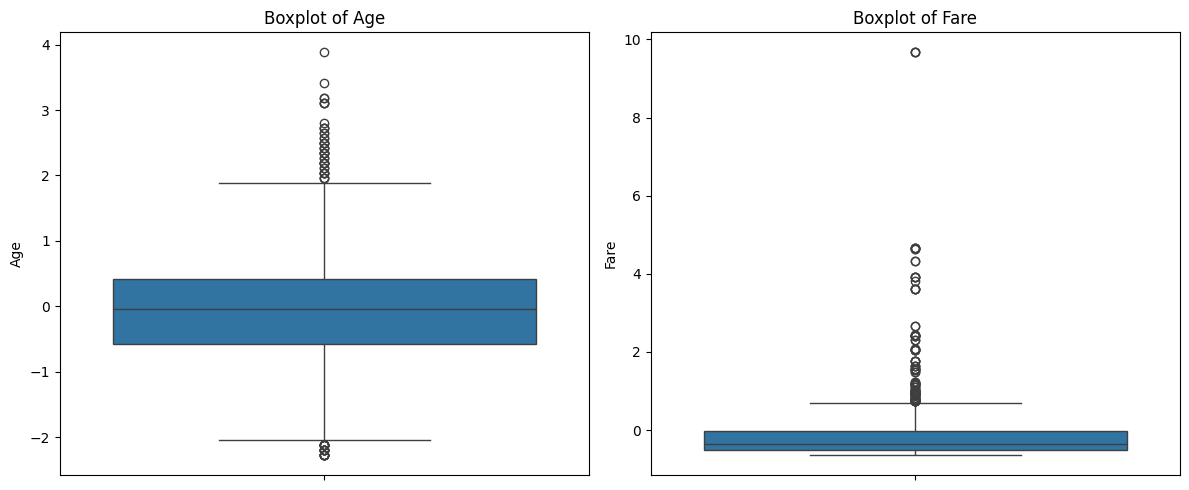

In [122]:
#5. Visualize outliers using boxplots and remove them
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=scaled_df['Age'])
plt.title('Boxplot of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y=scaled_df['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()

In [124]:
# List of numerical columns to remove outlier values
num_cols = ['Age', 'Fare']

# Remove outliers using IQR method
for col in num_cols:
    Q1 = scaled_df[col].quantile(0.25)
    Q3 = scaled_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    scaled_df = scaled_df[(scaled_df[col] >= lower_bound) & (scaled_df[col] <= upper_bound)]

print("After outlier removal:")
scaled_df.head()

After outlier removal:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,-0.789272,0.827377,-0.737695,-0.580044,0.432793,-0.473674,-0.498948,-0.482043,-0.307562,0.619306
2,1.266990,0.827377,1.355574,-0.272505,-0.474545,-0.473674,-0.498948,-0.482043,-0.307562,0.619306
4,-0.789272,0.827377,-0.737695,0.419458,-0.474545,-0.473674,-0.478817,-0.482043,-0.307562,0.619306
5,-0.789272,0.827377,-0.737695,-0.041851,-0.474545,-0.473674,-0.478817,-0.482043,3.251373,-1.614710
8,1.266990,0.827377,1.355574,-0.195620,-0.474545,2.008933,-0.418426,-0.482043,-0.307562,0.619306


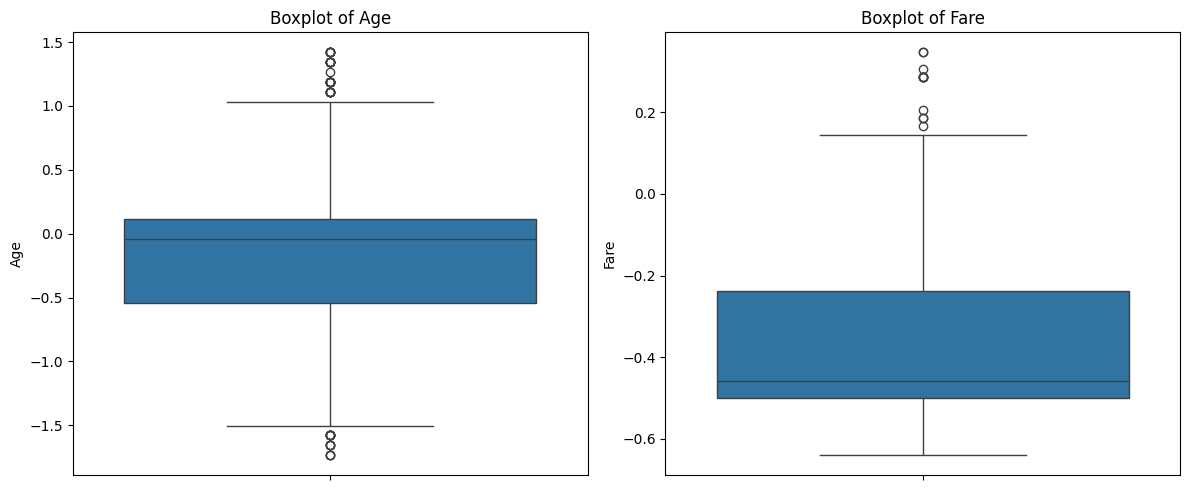

In [126]:
#Visualize after outlier removal(using IQR method)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=scaled_df['Age'])
plt.title('Boxplot of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y=scaled_df['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()

In [128]:
scaled_df.to_csv("Titanic-Dataset-Cleaned", index=False)